## DAB200 -- Lab 4

In this lab, you will gain some experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14_missing.csv |
| 4-6 | veh15_missing.csv |
| 7-9 | veh16_missing.csv |
| 10-12 | veh17_missing.csv |
| 13-15 | veh18_missing.csv |
| 16-18 | veh19_missing.csv |

**Important Notes:**
- Use [Chapter 7](https://mlbook.explained.ai/bulldozer-intro.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information by editing this cell:
 - Group Number 
 - Group Members

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - use Section 7.3 of the textbook as a guide, except:
     - use all of the data; and
     - use 150 decision trees in your random forest models
 - read in the data
 - isolate all numeric features from original data set
 - fill in any missing values with 0
 - create and evaluate a baseline model 

#### Code (10 marks)

**Replace the value of `data_string` with the data for your group. Do not use the full path; only the name of the data.csv**. You won't need a full path if you put your csv file in the same folder where you put this notebook

In [94]:
data_string = 'veh17_missing.csv'

**Code for reading data:**

In [95]:
#Importing all required libraries and reading the data with variable name "veh"
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from rfpimp import *
from pandas.api.types import is_string_dtype, is_object_dtype
import warnings
warnings.filterwarnings('ignore')

veh = pd.read_csv('veh17_missing.csv')
veh

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,1.5,4,48.8030,6,10.0,2,2,N,not specified,No,*****,N
1,2.0,4,34.1949,8,10.0,2,2,N,Spark Ignition Direct Injection,Yes,*****,N
2,2.0,4,36.5536,8,10.0,2,2,Y,not specified,Yes,Turbocharged,N
3,NaN,4,31.9863,6,15.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
4,NaN,4,33.9441,6,15.0,2,2,N,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,5.7,8,24.6535,8,10.0,1,1,N,not specified,No,*****,N
1240,2.0,4,35.2009,6,10.0,2,2,Y,Spark Ignition Direct Injection,No,Turbocharged,N
1241,5.0,8,22.8165,6,85.0,2,2,,Multipoint/sequential fuel injection,No,Naturally Aspirated,N
1242,NaN,6,28.4610,7,10.0,2,2,N,Spark Ignition Direct Injection,No,Naturally Aspirated,NaN


**Code for exploring data:**

In [116]:
#Isolating all numeric features from the data
veh_numeric=veh.select_dtypes(include=np.number)
veh_numeric.columns.tolist()


,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,1.5,4,48.8030,6,10.0,2,2,0.0,0.0,1,0.0,0.0
1,2.0,4,34.1949,8,10.0,2,2,0.0,1.0,2,0.0,0.0
2,2.0,4,36.5536,8,10.0,2,2,1.0,0.0,2,1.0,0.0
3,NaN,4,31.9863,6,15.0,2,2,0.0,2.0,1,2.0,0.0
4,NaN,4,33.9441,6,15.0,2,2,0.0,2.0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,5.7,8,24.6535,8,10.0,1,1,0.0,0.0,1,0.0,0.0
1240,2.0,4,35.2009,6,10.0,2,2,1.0,1.0,1,1.0,0.0
1241,5.0,8,22.8165,6,85.0,2,2,0.0,2.0,1,2.0,0.0
1242,NaN,6,28.4610,7,10.0,2,2,0.0,1.0,1,2.0,0.0


In [97]:
# Checking and displaying features with missing values
print("**Checking for Missing Values**","\n\n", veh_numeric.isnull().any())

**Checking for Missing Values** 

 Eng Displ                             True
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline              True
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
dtype: bool


In [98]:
# Fixing the missing values and rechecking for any possible missing values
veh_numeric["Eng Displ"].fillna(0, inplace = True)
veh_numeric["Max Ethanol % - Gasoline"].fillna(0, inplace = True)
print(veh_numeric.isnull().any())

Eng Displ                            False
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline             False
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
dtype: bool


#### Create and evaluate a baseline model after isolating numeric features:
Put all your code inside the function below. After your code is entered, running the function below must return the mean oob score. Do not provide any arguments to the function. You can **optionally** define other function(s) inside this function and also use them. 

The following function must return:
- **first item:** Mean OOB score of 10 runs
- **second item:** The last (i.e., the 10th) random forest regressor object (fitted)
- **third item:** Feature array
- **fourth item:** Target array

In [99]:
def estimate_mean_oob_score_baseline():
    X = veh_numeric.drop('Comb Unadj FE - Conventional Fuel', axis=1)
    y = veh_numeric['Comb Unadj FE - Conventional Fuel']
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
        rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
        rf.fit(X,y)
        feature_array=X
        target_array=y  
    baseline_oob = np.mean(rf.oob_score_)
    return baseline_oob, rf, feature_array, target_array

**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**

In [100]:
baseline_oob_score, rf, X, y = estimate_mean_oob_score_baseline()

num_trees = len(rf.estimators_)

print(baseline_oob_score, num_trees)

if data_string == 'veh14_missing.csv':
    output = 0.696
elif  data_string == 'veh15_missing.csv':
    output = 0.730
elif  data_string == 'veh16_missing.csv':
    output = 0.738
elif  data_string == 'veh17_missing.csv':
    output = 0.721
elif  data_string == 'veh18_missing.csv':
    output = 0.673
elif  data_string == 'veh19_missing.csv':
    output = 0.704
    

if (np.isclose(baseline_oob_score , output, rtol = 0.01) == True) and (num_trees==150):
    part1_marks = 10
    
assert np.isclose(baseline_oob_score , output, rtol = 0.01)

0.7227792287015286 150


**Show Importances:**

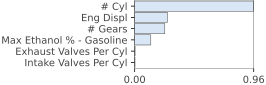

In [101]:
features=list(X.columns)
I=importances(rf,X,y,features=features)
plot_importances(I)

### Part 2 - Normalize missing values

In this part you should: 
 - use Section 7.4 of the textbook as a guide
 - convert **all** representations of missing data to a **single** representation
 
#### Code (15 marks)

**Code for exploring missing values:**

In [102]:
vehi_categorydata= veh.select_dtypes(include=[object])
vehi_categorydata.columns.tolist()

['Var Valve Lift?',
 'Fuel Metering Sys Desc',
 'Stop/Start System (Engine Management System)  Description',
 'Air Aspiration Method Desc',
 'Label Recalc?']

In [103]:
# Checking all the unique values in a column
print(vehi_categorydata['Var Valve Lift?'].unique())
print(vehi_categorydata['Fuel Metering Sys Desc'].unique())
print(vehi_categorydata['Stop/Start System (Engine Management System)  Description'].unique())
print(vehi_categorydata['Air Aspiration Method Desc'].unique())
print(vehi_categorydata['Label Recalc?'].unique())

['N' 'Y' nan '   ']
['not specified' 'Spark Ignition Direct Injection'
 'Multipoint/sequential fuel injection'
 'Spark Ignition direct & ported injection'
 'Common Rail Direct Diesel Injection'
 'Direct Diesel Injection (non-common rail)']
['No' 'Yes']
['*****' 'Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged']
['N' nan 'Y']


**Code for normalizing missing values:**

In [104]:
def normalize_missing_values():
    for col in veh:
        #vehi_categorydata[col] = vehi_categorydata[col].fillna(np.nan) # make None -> np.nan
        veh[col] = veh[col].replace('   ', np.nan)
        veh[col] = veh[col].replace('not specified', np.nan)
        veh[col] = veh[col].replace('*****', np.nan)
        veh[col] = veh[col].replace('nan  ', np.nan)
        
        
    return veh
    

In [108]:
vehfinal=veh

**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**

In [109]:
df = normalize_missing_values()

missing_vals = ['not provided', '##-##', '   ', 'none', 'not filled in', '^^', 'unknown', 'XXXXX', 
                'not specified', '*****', '@@@@@', 'none given', '%%%%%', 'missing', 'mod']

col_missing = []

for col in df.columns:
    col_missing.append(all(df[col].isin(missing_vals)))
    
if sum(col_missing) == 0:
    part2_marks = 15
else:
    part2_marks = 0
    
assert sum(col_missing) == 0

### Part 3 - Categorical features

In this part you should: 
 - use Section 7.5.1 as a guide
 - only use ordinal encoding 
 - convert **all** non-numeric features to numeric 
 - handle any missing values
 
#### Code (25 marks)

**Provide your code to convert all non-numeric features to numeric using ordinal encoding. Use `pandas` for ordinal encoding. Make sure that missing values are encoded as zero. Do not provide any arguments to the function below. All your code must be inside the function below**

In [113]:
def ordinal_encoding_non_numeric_cols():
    newdict = {'nan  ':0,"N":1, "Y":2,'   ':0,
           "Spark Ignition Direct Injection":1,"Multipoint/sequential fuel injection":2,"Spark Ignition direct & ported injection":3,"Common Rail Direct Diesel Injection":4,"Direct Diesel Injection (non-common rail)":5,"not specified":6,
           "No":1, "Yes":2,
           'nan ':0,'Turbocharged':1,'Naturally Aspirated':2, 'Supercharged':3, 'Turbocharged+Supercharged':4,
           'nan ':0,
           ' nan ':0,"N":0,"Y":1,'*****':0
          }
    
    vehfinal["Var Valve Lift?"] = vehfinal["Var Valve Lift?"].replace(newdict).fillna(0)
    vehfinal["Fuel Metering Sys Desc"] = vehfinal["Fuel Metering Sys Desc"].replace(newdict).fillna(0)
    vehfinal['Stop/Start System (Engine Management System)  Description']=vehfinal['Stop/Start System (Engine Management System)  Description'].replace(newdict).fillna(0)
    vehfinal['Air Aspiration Method Desc']=vehfinal['Air Aspiration Method Desc'].replace(newdict).fillna(0)
    vehfinal['Label Recalc?']=vehfinal['Label Recalc?'].replace(newdict).fillna(0)

    return vehfinal
    

In [115]:
vehfinal

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,1.5,4,48.8030,6,10.0,2,2,0.0,0.0,1,0.0,0.0
1,2.0,4,34.1949,8,10.0,2,2,0.0,1.0,2,0.0,0.0
2,2.0,4,36.5536,8,10.0,2,2,1.0,0.0,2,1.0,0.0
3,NaN,4,31.9863,6,15.0,2,2,0.0,2.0,1,2.0,0.0
4,NaN,4,33.9441,6,15.0,2,2,0.0,2.0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,5.7,8,24.6535,8,10.0,1,1,0.0,0.0,1,0.0,0.0
1240,2.0,4,35.2009,6,10.0,2,2,1.0,1.0,1,1.0,0.0
1241,5.0,8,22.8165,6,85.0,2,2,0.0,2.0,1,2.0,0.0
1242,NaN,6,28.4610,7,10.0,2,2,0.0,1.0,1,2.0,0.0


In [117]:
#Converting to numeric
vehfinal["Var Valve Lift?"].astype(int)
vehfinal["Fuel Metering Sys Desc"].astype(int)
vehfinal['Stop/Start System (Engine Management System)  Description'].astype(int)
vehfinal['Air Aspiration Method Desc'].astype(int)
vehfinal['Label Recalc?'].astype(int)

vehfinal= vehfinal.select_dtypes(include=[np.number])
vehfinal

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Var Valve Lift?,Fuel Metering Sys Desc,Stop/Start System (Engine Management System) Description,Air Aspiration Method Desc,Label Recalc?
0,1.5,4,48.8030,6,10.0,2,2,0.0,0.0,1,0.0,0.0
1,2.0,4,34.1949,8,10.0,2,2,0.0,1.0,2,0.0,0.0
2,2.0,4,36.5536,8,10.0,2,2,1.0,0.0,2,1.0,0.0
3,NaN,4,31.9863,6,15.0,2,2,0.0,2.0,1,2.0,0.0
4,NaN,4,33.9441,6,15.0,2,2,0.0,2.0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,5.7,8,24.6535,8,10.0,1,1,0.0,0.0,1,0.0,0.0
1240,2.0,4,35.2009,6,10.0,2,2,1.0,1.0,1,1.0,0.0
1241,5.0,8,22.8165,6,85.0,2,2,0.0,2.0,1,2.0,0.0
1242,NaN,6,28.4610,7,10.0,2,2,0.0,1.0,1,2.0,0.0


**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**


In [72]:
df = ordinal_encoding_non_numeric_cols()

from pandas.api.types import is_numeric_dtype

cols_are_numeric = []
for col in df.columns:
    if col != 'Comb Unadj FE - Conventional Fuel':
        cols_are_numeric.append(is_numeric_dtype(df[col]))
    
    
if (df.shape[1]) - 1 == sum(cols_are_numeric):
    part3_marks = 25
else:
    part3_marks = 0
    
assert (df.shape[1]) - 1 == sum(cols_are_numeric)

KeyError: 'Var Valve Lift?'

### Part 4 - Numeric features

In this part you should: 
 - use Section 7.5.2 as a guide
 - handle any missing values
 
#### Code (30 marks)

In [73]:
print(veh_numeric.isnull().any())

Eng Displ                            False
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline             False
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
dtype: bool


In [ ]:
#just returning the numeric values data frame as there are no missing values
def fill_missing_vals_num():
    return veh_numeric

**Running the following cell should not throw any error if your code in the cell above is correct. Do not edit the following cell.**

In [ ]:
df = fill_missing_vals_num()

cols_not_null = []
for col in df.columns:
    cols_not_null.append(sum(pd.isnull(df[col])))
    
if all(cols_not_null) == 0:
    part4_marks = 30
else:
    part4_marks = 0
    
assert all(cols_not_null) == 0

### Part 5 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features after processing them in Parts 2, 3, and 4 above 
 - use 150 decision trees
 
The following function must return:
- **first item:** Mean OOB score of 10 runs
- **second item:** The last (i.e., the 10th) random forest regressor object (fitted)
- **third item:** Feature array
- **fourth item:** Target array

#### Code (10 marks)

In [ ]:
def estimate_mean_oob_score_final():
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
veh_numeric=veh.select_dtypes(include=np.number)
veh_numeric.columns.tolist()

In [ ]:
veh.columns.tolist()

In [ ]:
final_oob_score, rf, X, y = estimate_mean_oob_score_final()

num_trees = len(rf.estimators_)

print(final_oob_score, num_trees)

if final_oob_score > baseline_oob_score:
    part5_marks = 10
else:
    part5_marks = 0
    
assert final_oob_score > baseline_oob_score

**Show importances:**

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Part 6 - Lab Viva

**Following questions and / or other questions will be asked to every student during the live session for viva:**

- How was "missing" data represented?
- Calculate the percent difference between baseline and final model scores
- What does the importances plot show for the final model?
- For numeric columns, what did you replace the missing values with? Why?
- Can missing values be predictive? Give an example.


#### (10 marks)

YOUR ANSWER HERE

In [ ]:
parts_1_to_5_marks = part1_marks + part2_marks + part3_marks + part4_marks + part5_marks
parts_1_to_5_marks

# part6_marks =


total_marks = parts_1_to_5_marks #+ part6_marks
total_marks